## Lec50 Quantifying the effect of Triadic Closure

<img src="lec50_1.png">
<img src="lec50_2.png">
<img src="lec50_3.png">

* In multiple triadic closure the probabilty of two people becoming friends increases with increase in number of common friends

## Lec51 : Fatman Evolutionary Model : Implementing closures

<img src="lec51_1.png">
<img src="lec51_2.png">

In [17]:
##prev start
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
import math
import time

def create_graph():
    G = nx.Graph()
    #G.add_nodes_from(range(1, 101))
    for i in range(1, 101):
        G.add_node(i)
    return G

def visualize(G):
    time.sleep(2)
    label_dict = get_labels(G)
    #print label_dict
    node_size = get_size(G)
    color_array = get_colors(G)
    nx.draw(G, labels = label_dict, with_labels=1, node_size = node_size, node_color = color_array)
    #nx.draw(G, with_labels=1, node_size = nsize)
    #plt.show() 
    plt.savefig('evolution.jpg')
    plt.clf()
    plt.cla()
#G = create_graph()
#visualize(G)

#Assigning BMI 
def assign_bmi(G):
    for each in G.nodes():
        G.node[each]['name'] = rd.randint(15, 40)
        G.node[each]['type'] = 'person'
        
        
def get_labels(G):
    dict1 = {}
    for each in G.nodes():
        dict1[each] = G.node[each]['name']
    return dict1

def get_size(G):
    l1 = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            l1.append(G.node[each]['name'] *5)#Scaling for beautiful G
        else:
            l1.append(1000)
    return l1

def add_foci_nodes(G):
    n = G.number_of_nodes()
    i = n + 1
    foci_nodes = ['gym', 'eat_out', 'movie_club', 'karate_club', 'yoga_club']
    for j in range(5):
        G.add_node(i)
        G.node[i]['name'] = foci_nodes[j]
        G.node[i]['type'] = 'foci'
        i = i+1
        
def get_colors(G):
    c = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            if G.node[each]['name'] == 15:
                c.append('green')
            elif G.node[each]['name'] == 40:
                c.append('yellow')
            else:
                c.append('blue')
        else: 
            c.append('red')
    return c

def get_foci_nodes():
    f = []
    for each in G.nodes():
        if G.node[each]['type'] == 'foci':
            f.append(each)
    return f

def get_persons_nodes():
    p = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            p.append(each)
    return p

def add_foci_edges():
    foci_nodes = get_foci_nodes()
    person_nodes = get_persons_nodes()
    for each in person_nodes:
        r = rd.choice(foci_nodes)
        G.add_edge(each, r)
        
def homophily(G):
    p_nodes = get_persons_nodes()
    for u in p_nodes:
        for v in p_nodes:
            if u != v:
                diff = abs(G.node[u]['name'] - G.node[v]['name'])
                p = float(1) / (diff+500) # decrease the value to make more inter connections
                r = rd.uniform(0, 1)
                if r < p:
                     G.add_edge(u, v)
        
# prev end

def cmn(u, v, G):
    nu = set(G.neighbors(u))
    nv = set(G.neighbors(v))
    return len(nu & nv)# No. of common neighbors
    
    
def closure(G):
    array1 = []#[first_node, sec_node, prob]
    for u in G.nodes():
        for v in G.nodes():
            if u!= v and (G.node[u]['type'] == 'person' or G.node[v]['type'] == 'person'):
                k  = cmn(u, v, G)
                p = 1-math.pow((1-0.01), k)
                tmp = []
                tmp.append(u)
                tmp.append(v)
                tmp.append(p)
                array1.append(tmp)
    #print array1
    for each in array1:
        u = each[0]
        v = each[1]
        p = each[2]
        r = rd.uniform(0, 1)
        if r < p:
            G.add_edge(u, v)
        
        
def change_bmi(G):
    fnodes = get_foci_nodes()
    for each in fnodes:
        if G.node[each]['name'] == 'eat_out':
            for each1 in G.neighbors(each):
                if G.node[each1]['name'] != 40:
                    G.node[each1]['name'] =   G.node[each1]['name'] + 1
        elif G.node[each]['name'] == 'gym':
            for each1 in G.neighbors(each):
                if G.node[each1]['name'] != 15:
                    G.node[each1]['name'] =   G.node[each1]['name'] - 1
        
G = create_graph()
assign_bmi(G)   
add_foci_nodes(G)
add_foci_edges()

time.sleep(10)
visualize(G)

for t in range(0, 10):
    homophily(G)
    closure(G) #Without homophily -> Foci Closure, Else other closures
    change_bmi(G)
    visualize(G)
    


## Lec52 : Fatman Evolutionary Model : Implementing Social Influence

<img src="lec52_1.png">
<img src="lec52_2.png">

Refer the ablove code


## Lec53: Fatman Evolutionary Model : Storing and Analyzing Longitudinal Data

In [20]:
##prev start
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
import math
import time

def create_graph():
    G = nx.Graph()
    #G.add_nodes_from(range(1, 101))
    for i in range(1, 101):
        G.add_node(i)
    return G

def visualize(G, t):
    time.sleep(2)
    label_dict = get_labels(G)
    #print label_dict
    node_size = get_size(G)
    color_array = get_colors(G)
    nx.draw(G, labels = label_dict, with_labels=1, node_size = node_size, node_color = color_array)
    #nx.draw(G, with_labels=1, node_size = nsize)
    #plt.show() 
    plt.savefig('evolution.jpg')
    plt.clf()
    plt.cla()
    nx.write_gml(G, 'evolution_'+str(t)+'.gml')
#G = create_graph()
#visualize(G)

#Assigning BMI 
def assign_bmi(G):
    for each in G.nodes():
        G.node[each]['name'] = rd.randint(15, 40)
        G.node[each]['type'] = 'person'
        
        
def get_labels(G):
    dict1 = {}
    for each in G.nodes():
        dict1[each] = G.node[each]['name']
    return dict1

def get_size(G):
    l1 = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            l1.append(G.node[each]['name'] *5)#Scaling for beautiful G
        else:
            l1.append(1000)
    return l1

def add_foci_nodes(G):
    n = G.number_of_nodes()
    i = n + 1
    foci_nodes = ['gym', 'eat_out', 'movie_club', 'karate_club', 'yoga_club']
    for j in range(5):
        G.add_node(i)
        G.node[i]['name'] = foci_nodes[j]
        G.node[i]['type'] = 'foci'
        i = i+1
        
def get_colors(G):
    c = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            if G.node[each]['name'] == 15:
                c.append('green')
            elif G.node[each]['name'] == 40:
                c.append('yellow')
            else:
                c.append('blue')
        else: 
            c.append('red')
    return c

def get_foci_nodes():
    f = []
    for each in G.nodes():
        if G.node[each]['type'] == 'foci':
            f.append(each)
    return f

def get_persons_nodes():
    p = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            p.append(each)
    return p

def add_foci_edges():
    foci_nodes = get_foci_nodes()
    person_nodes = get_persons_nodes()
    for each in person_nodes:
        r = rd.choice(foci_nodes)
        G.add_edge(each, r)
        
def homophily(G):
    p_nodes = get_persons_nodes()
    for u in p_nodes:
        for v in p_nodes:
            if u != v:
                diff = abs(G.node[u]['name'] - G.node[v]['name'])
                p = float(1) / (diff+500) # decrease the value to make more inter connections
                r = rd.uniform(0, 1)
                if r < p:
                     G.add_edge(u, v)
        
# prev end

def cmn(u, v, G):
    nu = set(G.neighbors(u))
    nv = set(G.neighbors(v))
    return len(nu & nv)# No. of common neighbors
    
    
def closure(G):
    array1 = []#[first_node, sec_node, prob]
    for u in G.nodes():
        for v in G.nodes():
            if u!= v and (G.node[u]['type'] == 'person' or G.node[v]['type'] == 'person'):
                k  = cmn(u, v, G)
                p = 1-math.pow((1-0.01), k)
                tmp = []
                tmp.append(u)
                tmp.append(v)
                tmp.append(p)
                array1.append(tmp)
    #print array1
    for each in array1:
        u = each[0]
        v = each[1]
        p = each[2]
        r = rd.uniform(0, 1)
        if r < p:
            G.add_edge(u, v)
        
        
def change_bmi(G):
    fnodes = get_foci_nodes()
    for each in fnodes:
        if G.node[each]['name'] == 'eat_out':
            for each1 in G.neighbors(each):
                if G.node[each1]['name'] != 40:
                    G.node[each1]['name'] =   G.node[each1]['name'] + 1
        elif G.node[each]['name'] == 'gym':
            for each1 in G.neighbors(each):
                if G.node[each1]['name'] != 15:
                    G.node[each1]['name'] =   G.node[each1]['name'] - 1
        
G = create_graph()
assign_bmi(G)   
add_foci_nodes(G)
add_foci_edges()

time.sleep(10)
t = 0
visualize(G, t)

#nx.write_gml(G, 'evolution_0.gml')

for t in range(0, 10):
    homophily(G)
    closure(G) #Without homophily -> Foci Closure, Else other closures
    change_bmi(G)
    visualize(G, t+1)
    


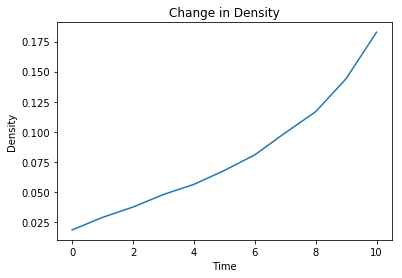

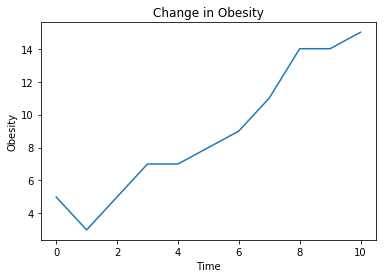

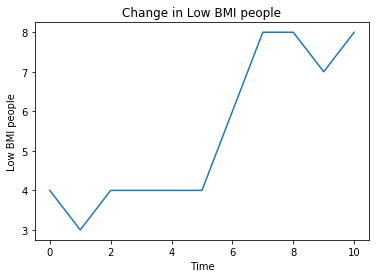

In [25]:
#analsis.py
import networkx as nx
import matplotlib.pyplot as plt

#x - iteration, y - density
def plot_density():
    x = []
    y = []
    for i in range(11):
        G = nx.read_gml('evolution_'+str(i)+'.gml')
        x.append(i)
        y.append(nx.density(G))
        
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.title('Change in Density')
    plt.plot(x, y)
    plt.show()
    
def obesity(G):
    num = 0
    for each in G.nodes():
        if G.node[each]['name'] == 40:
            num += 1
    return num
    
def plot_obesity():
    x = []
    y = []
    for i in range(11):
        G = nx.read_gml('evolution_'+str(i)+'.gml')
        x.append(i)
        y.append(obesity(G))
        
    plt.xlabel('Time')
    plt.ylabel('Obesity')
    plt.title('Change in Obesity')
    plt.plot(x, y)
    plt.show()
    
def gym_effect(G):
    num = 0
    for each in G.nodes():
        if G.node[each]['name'] == 15:
            num += 1
    return num
    
def plot_gym_effect():
    x = []
    y = []
    for i in range(11):
        G = nx.read_gml('evolution_'+str(i)+'.gml')
        x.append(i)
        y.append(gym_effect(G))
        
    plt.xlabel('Time')
    plt.ylabel('Low BMI people')
    plt.title('Change in Low BMI people')
    plt.plot(x, y)
    plt.show()
    
plot_density()
plot_obesity()
plot_gym_effect()